In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re # 複数の文字区切り 
%matplotlib inline

#initialize
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"

def isint(s):  # 整数値を表しているかどうかを判定
    try:
        int(s, 10)  # 文字列を実際にint関数で変換してみる
    except ValueError:
        return False
    else:
        #print(int(s))
        return True

def isfloat(s):  # 浮動小数点数値を表しているかどうかを判定
    try:
        float(s)  # 文字列を実際にfloat関数で変換してみる
    except ValueError:
        return False
    else:
        #print(float(s))
        return True

#nrows = 1
#ncols = 1

fig, axs = plt.subplots(
    nrows=1, 
    ncols=1,
    figsize=(8, 5),
    tight_layout=True,
    )

columns = ['step', 'K', 'U', 'K + U', 'N']

files=[
    './log_random_SiO_576_relax_50eVO_00_dt10-2.txt',
    './log_random_SiO_576_relax_50eVO_00_dt10-1.txt'
    ]

labels=[
    'test1',
    'test2'
    ]

colors=[
    'deepskyblue',
    'mediumvioletred',
    'yellowgreen',
    'orangered',
    'gold'
    ]



for i in range(0, len(files)):
    f = open(files[i], 'r')

    data_set = np.empty([0, len(columns)])

    #data = np.empty([0, len(columns)])
    #print(data.size)

    for line in f:
        splited = re.split('[,:+/=\n]', line) #[]で囲む必要あり
        #line = line.split(',') #通常のsplitは区切り文字は一文字しか指定できない
        
        for j in range(0, len(splited)) :
            splited[j] = splited[j].strip(' \t\n')
            if len(splited[j]) == 0 :
                del splited[j]

        #print(splited)

        if splited[0] != 'step':
            continue

        data = np.arange(0)

        for s in splited:
            if isint(s):
                data = np.append(data, int(s))
            elif isfloat(s):
                data = np.append(data, float(s))
            else :
                continue

        #print(a)
        data_set = np.vstack((data_set, data))


    f.close()
    #print(data_set)
    
    #データフレーム化
    df = pd.DataFrame(data_set)

    #print出力上限の設定
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 5
    #print(df)

    #カラムとインデクスの設定
    df.columns = columns
    #print(df)
    
    #df[['time', 'T w/o Lange']].set_index('time')
    df.set_index('step')
    #print(df)
    #print(df.count())
    
    #print(type(df['K + U']))
    Etot = df['K + U']
    Eavr = 0
    for E in Etot :
        Eavr += E
    Eavr /= len(Etot)
    #print("Eavr = ", Eavr)
    
    abs_dE = np.arange(0)
    for E in Etot :
        abs_dE = np.append(abs_dE, abs(E - Eavr))
    
    #カラムに結合
    df['absΔE'] = abs_dE
    #print(df)
    
    
    
    df_range = df.index
    #print(df_range)
    
    #スライスでDataFrameの要素を取り出す
    df = df.iloc[:df_range.stop - 1, :]
    #print(df)

    axs.plot(
        df['step'], df['absΔE'],
        linewidth=0.6, marker='o', markersize=0, color=colors[i], label=labels[i]
    )



In [13]:
axs.set_title("Energy conservation test", size=14, weight="light")

axs.set_xlabel("MD step count", size=13, weight="light")
#axs.set_xlim([-10.0,1.0e6])

axs.set_ylabel("Total energy (eV)", size=13, weight = "light")

axs.set_yscale('log')

#axs.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs.ticklabel_format(
    axis='x',
    style='sci', #指数表示
    #style='plain', #指数表示なし
    scilimits=(0, 4),  # 10^0 ~ 10^4は指数表示なし
    useOffset=True,
    useMathText=True,  # x10^N
)
axs.xaxis.offsetText.set_fontsize(12)

axs.tick_params(direction = "in", length = 5)
axs.tick_params(labelsize=12)

axs.grid(linestyle='solid', linewidth=0.3)

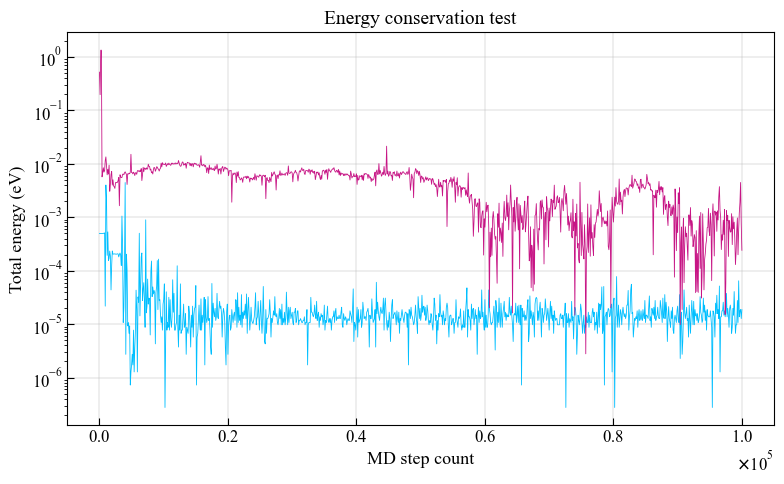

In [14]:
sns.set()
plt.yscale('log')
plt.show()